In [37]:
%matplotlib notebook
%matplotlib inline

import pandas as pd
import numpy as np
import random
import requests
import json
import time
import matplotlib.pyplot as plt

from scipy import stats
from citipy import citipy
from config import wkey


In [2]:
#Num of samples for project

smpl = 20
# create a list of lat and lngs
slat = np.random.uniform(low=-90.000, high=90.000, size=smpl)
slng = np.random.uniform(low=-180.000, high=180.000, size=smpl)


#add list to dict then start a dataframe
samples = {
    'rand_lat':slat,
    'rand_lng':slng
          }

df1 = pd.DataFrame(samples)
df1.shape
df1.head()


,rand_lat,rand_lng
0,74.496803,-72.952987
1,-3.745709,28.843148
2,77.093395,82.666292
3,67.830877,154.903612
4,6.445872,119.438165


In [3]:
#use citipy to find nearest city and populate dataframe

df1['Nearest_City']=''
df1['Country']=''
    

for index, row in df1.iterrows():
    
    #row vars
    lat = row['rand_lat']
    lng = row['rand_lng']

   #populate cells
    try:
        df1.loc[index, ['Nearest_City']]   = citipy.nearest_city(lat, lng).city_name
        df1.loc[index, ['Country']]   = citipy.nearest_city(lat, lng).country_code
        
    except:
        pass
  
df1.head(8)

,rand_lat,rand_lng,Nearest_City,Country
0,74.496803,-72.952987,qaanaaq,gl
1,-3.745709,28.843148,uvira,cd
2,77.093395,82.666292,dikson,ru
3,67.830877,154.903612,srednekolymsk,ru
4,6.445872,119.438165,cagayan de tawi-tawi,ph
5,78.065404,120.249359,saskylakh,ru
6,11.823399,127.586426,sulangan,ph
7,78.568971,79.697847,dikson,ru


In [4]:
#add columns for Temp, Humid, Cloudiness, and Windspeed then populate via API
df1['Temperature_F']=''
df1['Humidity_Perc']=''
df1['Cloudiness_Perc']=''
df1['Wind_Speed_MPH'] =''


,rand_lat,rand_lng,Nearest_City,Country,Temperature_F,Humidity_Perc,Cloudiness_Perc,Wind_Speed_MPH
0,74.496803,-72.952987,qaanaaq,gl,,,,
1,-3.745709,28.843148,uvira,cd,,,,
2,77.093395,82.666292,dikson,ru,,,,
3,67.830877,154.903612,srednekolymsk,ru,,,,
4,6.445872,119.438165,cagayan de tawi-tawi,ph,,,,
5,78.065404,120.249359,saskylakh,ru,,,,
6,11.823399,127.586426,sulangan,ph,,,,
7,78.568971,79.697847,dikson,ru,,,,


In [5]:
#call openweathermap endpoint to get weather metrics and populate dataframe

city ='' #this is just used to print out data as the API is executing
cntry ='' #this is just used to print out data as the API is executing
response_time ='' #this is just used to print out data as the API is executing
code = '' #this is just used to print out data as the API is executing

for index, row in df1.iterrows():
    
    #build query url
    city  = row['Nearest_City']
    cntry = row['Country']
    qurl  = f'http://api.openweathermap.org/data/2.5/weather?q={city},{cntry}&units=imperial&appid={wkey}'

    
    #build a response json object
    response = requests.get(qurl)
    response_json = response.json()

   #populate cells
    try:
        df1.loc[index, ['Temperature_F']]   = response_json['main']['temp']
        df1.loc[index, ['Humidity_Perc']]   = response_json['main']['humidity']
        df1.loc[index, ['Cloudiness_Perc']] = response_json['clouds']['all']
        df1.loc[index, ['Wind_Speed_MPH']]  = response_json['wind']['speed']
        

        city = response_json['name']
        cntry = response_json['sys']['country']
        response_time = response.elapsed.total_seconds()
        print(f'weather response for {city}, {cntry} in {response_time} seconds')
        
    except:
        df1.loc[index, ['Temperature_F']]  = np.nan 
        code = response_json['cod']
        print(f'Error response for {city}, {cntry} code {code}')
     
    #sleep based on last response, lets us know if server slowing down
    time.sleep(response.elapsed.total_seconds())
              
        
print('The data frame has been updated via api.openweathermap.org')



weather response for Qaanaaq, GL in 0.386585 seconds
weather response for Uvira, CD in 0.100708 seconds
weather response for Dikson, RU in 0.10739 seconds
weather response for Srednekolymsk, RU in 0.378373 seconds
Error response for cagayan de tawi-tawi, ph code 404
weather response for Saskylakh, RU in 0.142637 seconds
weather response for Sulangan, PH in 1.511857 seconds
weather response for Dikson, RU in 0.105375 seconds
weather response for Adrar, DZ in 0.09929 seconds
weather response for Ribeira Grande, PT in 0.370962 seconds
weather response for Rio Gallegos, AR in 0.111016 seconds
weather response for Ushuaia, AR in 0.106639 seconds
Error response for belushya guba, ru code 404
weather response for Kapaa, US in 0.091912 seconds
Error response for illoqqortoormiut, gl code 404
weather response for Mananara, MG in 0.113874 seconds
weather response for Hilo, US in 0.254566 seconds
weather response for Esperance, AU in 0.13008 seconds
weather response for Serta, PT in 0.089493 seco

In [6]:
#drop rows with 404 errors
df1.dropna(subset=['Temperature_F'], inplace = True)

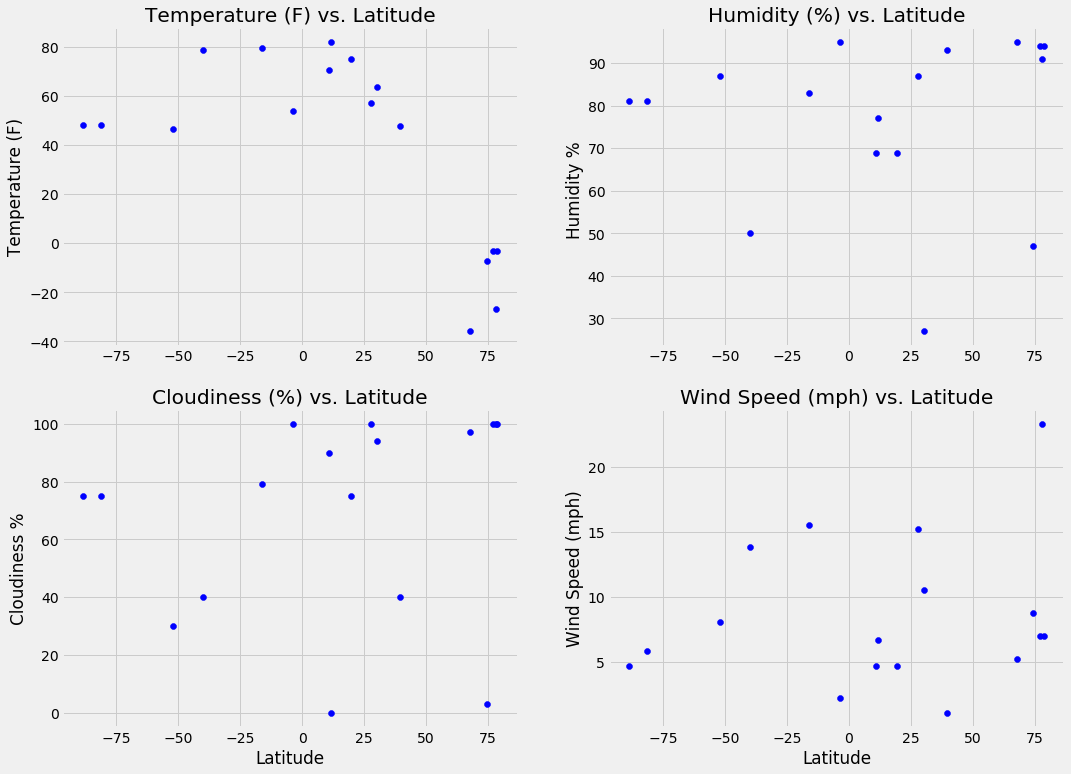

In [58]:
#Create Plots - Use Subplots

# create data for axes
lat   = df1['rand_lat'].to_list()
tempF = df1['Temperature_F'].to_list()
humdP = df1['Humidity_Perc'].to_list()
cldyP = df1['Cloudiness_Perc'].to_list()
winsM = df1['Wind_Speed_MPH'].to_list()


#plot data
plt.style.use('fivethirtyeight')
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrows = 2, ncols = 2,figsize=(16,12))

ax1.scatter(lat,tempF, label = 'TempVLat', c = 'b' )
ax1.set_title('Temperature (F) vs. Latitude')
#ax1.set_xlabel('Latitude')
ax1.set_ylabel('Temperature (F)')

ax2.scatter(lat,humdP, label = 'HumidityVLat' , c = 'b')
ax2.set_title('Humidity (%) vs. Latitude')
#ax2.set_xlabel('Latitude')
ax2.set_ylabel('Humidity % ')

ax3.scatter(lat,cldyP, label = 'CldVLat' , c = 'b')
ax3.set_title('Cloudiness (%) vs. Latitude')
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Cloudiness %')

ax4.scatter(lat,winsM, label = 'WindVLat' , c = 'b')
ax4.set_title('Wind Speed (mph) vs. Latitude')
ax4.set_xlabel('Latitude')
ax4.set_ylabel('Wind Speed (mph)')

#plt.tight_layout()
plt.show()

fig.savefig('Latitude_Subplots.png')

In [22]:
# Create Northern and Sourther Hemisphere DataFrames and axes data
#Create the two dataframes
nh_DF = df1[(df1['rand_lat'] >= 0)]
sh_DF = df1[(df1['rand_lat'] < 0)]

#create data for axes
# create data for axes
nh_lat   = nh_DF['rand_lat'].to_list()
sh_lat   = sh_DF['rand_lat'].to_list()
nh_tempF = nh_DF['Temperature_F'].to_list()
sh_tempF = sh_DF['Temperature_F'].to_list()
nh_humdP = nh_DF['Humidity_Perc'].to_list()
sh_humdP = sh_DF['Humidity_Perc'].to_list()
nh_cldyP = nh_DF['Cloudiness_Perc'].to_list()
sh_cldyP = sh_DF['Cloudiness_Perc'].to_list()
nh_winsM = nh_DF['Wind_Speed_MPH'].to_list()
sh_winsM = sh_DF['Wind_Speed_MPH'].to_list()


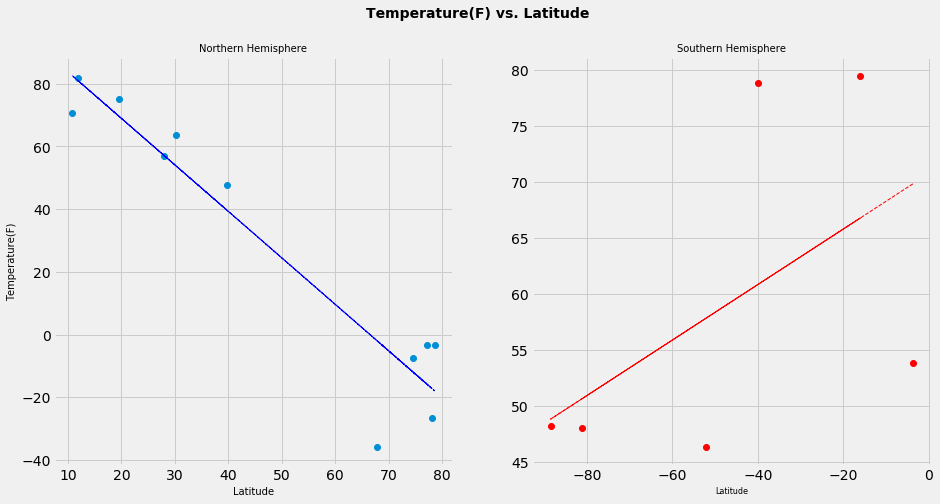

In [68]:
# do linear regression analysis
#Temperature (F) vs. Latitude

#Northern Hemisphere 
nh_lat   = nh_DF.iloc[:, 0].astype(float)
nh_tempF = nh_DF.iloc[:, 4].astype(float)
nt_slope, nt_int, nt_r, nt_p, nt_std_err = stats.linregress(
    nh_lat, nh_tempF)
nt_fit = nt_slope * nh_lat + nt_int

#Southern Hemisphere
sh_lat   = sh_DF.iloc[:, 0].astype(float)
sh_tempF = sh_DF.iloc[:, 4].astype(float)
st_slope, st_int, st_r, st_p, st_std_err = stats.linregress(
    sh_lat, sh_tempF)
st_fit = st_slope * sh_lat + st_int

# Plot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,figsize=(14,7))
fig.suptitle('Temperature(F) vs. Latitude', fontsize=14, fontweight="bold")

ax1.scatter(nh_lat, nh_tempF, linewidth=1, marker="o")
ax1.plot(nh_lat, nt_fit, "b--", linewidth=1)
ax1.set_title('Northern Hemisphere', fontsize=10)
ax1.set_ylabel('Temperature(F)', fontsize= 10)
ax1.set_xlabel('Latitude', fontsize= 10)

ax2.scatter(sh_lat, sh_tempF, linewidth=1, marker="o", color="r")
ax2.plot(sh_lat, st_fit, "r--", linewidth=1)
ax2.set_title('Southern Hemisphere', fontsize=10)
#ax2.set_ylabel('Temperature(F)', fontsize=10)
ax2.set_xlabel('Latitude', fontsize= 8)

plt.show()

fig.savefig('TempVsLat_Hemispheres.png')